# YOLOv5

A notebook to train, detect, and validate

Prior to running this notebook, you must install YOLOv5 from the ultralytics github page in the same working folder as this notebook:

```
$ git clone https://github.com/ultralytics/yolov5
$ cd yolov5
$ pip install -r requirements.txt
```

You must also have downloaded the livestalk cow dataset from Roboflow, in the working folder. 

In [1]:
import os
from roboflow import Roboflow

%cd yolov5


/home/omar/datasci/w251-DL/livestalk/yolov5


In [2]:
# datapath - this should point to the root directory where the dataset exists (with train/valid/test folders)
datapath = os.path.join(os.path.dirname(os.getcwd()),'livestalk-carbondale')
# name - this is the name that will be used for this run -- in Wandb this is the name that will be used to track the model results
name = 'yolov5s_carbondale_v1'

# Train

In [3]:
!python train.py --img 720 --batch 16 --epochs 100 --name $name --data $datapath/data.yaml --weights yolov5s.pt --cache

wandb: Currently logged in as: omarkapur-mids (use `wandb login --relogin` to force relogin)
train: weights=yolov5s.pt, cfg=, data=/home/omar/datasci/w251-DL/livestalk/livestalk-carbondale/data.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=100, batch_size=16, imgsz=720, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=8, project=runs/train, name=yolov5s_carbondale_v1, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=0, save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 7 commits. Use `git pull` or `git clone https://github.com/ultralytics/yolov5` to update.
YOLOv5 🚀 v6.0-104-g4ca4aec torch 1.9.0 CUDA:0 (GeForce RTX 3090, 24265MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, 

# Detect

In [4]:
!python detect.py --weights runs/train/$name/weights/best.pt --img 720 --conf 0.1 --source $datapath/test/images --save-txt

detect: weights=['runs/train/yolov5s_carbondale_v1/weights/best.pt'], source=/home/omar/datasci/w251-DL/livestalk/livestalk-carbondale/test/images, imgsz=[720, 720], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-104-g4ca4aec torch 1.9.0 CUDA:0 (GeForce RTX 3090, 24265MiB)

Fusing layers... 
Model Summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/16 /home/omar/datasci/w251-DL/livestalk/livestalk-carbondale/test/images/AUG_53E8ED0E584E9415F2F61AAF1742481C_jpg.rf.d2c1b69b6ea2384751ddd5d572404054.jpg: 736x736 8 cows, Done. (0.005s)
image 2/16 /home/omar/datasci/w251-DL/livestalk/livestalk-carbondale/test/images/AUG_5C45037EB35E2A964555A0CAE6BAD3CC_jpg.rf.dd5b77c4272b

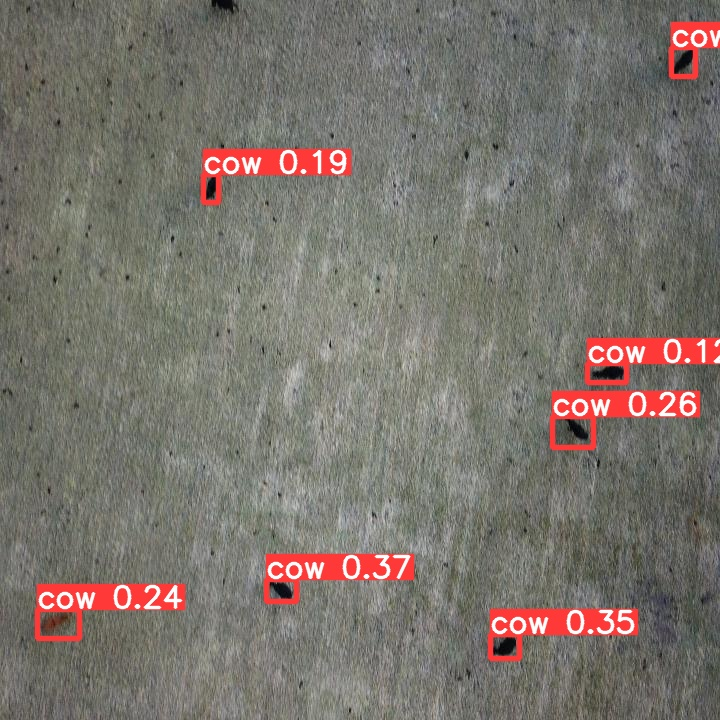

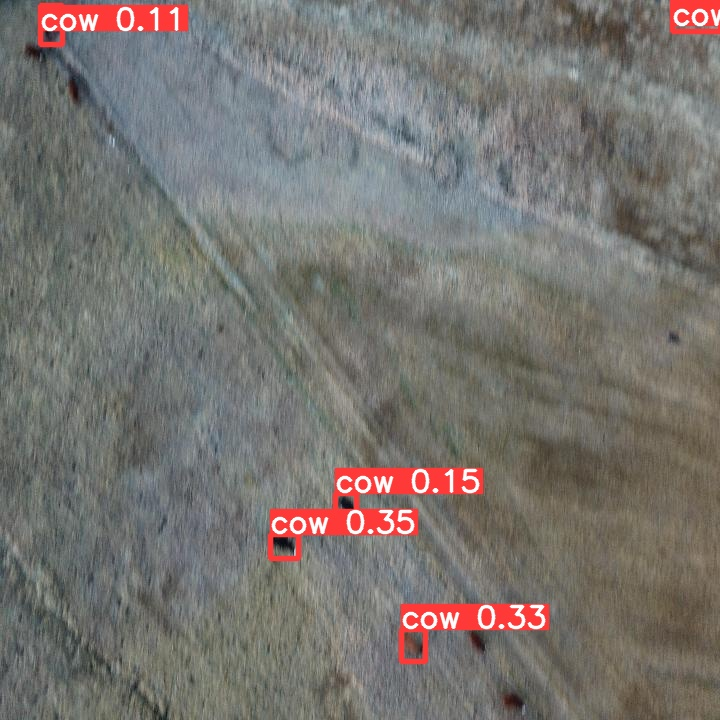



./runs/detect/exp20/AUG_9FC7DF5FBFF29580C510597062E92632_jpg.rf.f5fe7e663720b7bd77740ed4c5989235.jpg


./runs/detect/exp20/AUG_53E8ED0E584E9415F2F61AAF1742481C_jpg.rf.d2c1b69b6ea2384751ddd5d572404054.jpg


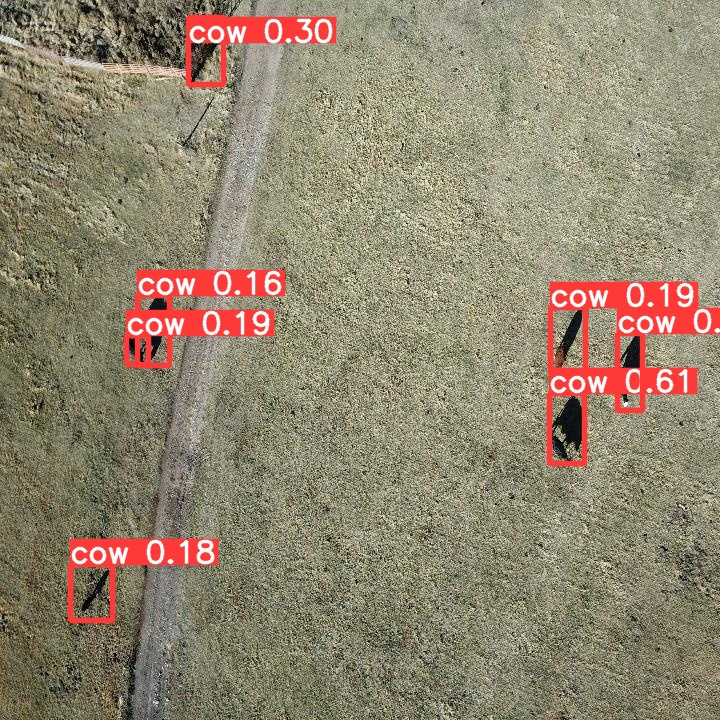



./runs/detect/exp20/AUG_DDC09A80A96576AE45CB0C617C413181_jpg.rf.4597329fb2315bd12727d7c324e1e1ca.jpg


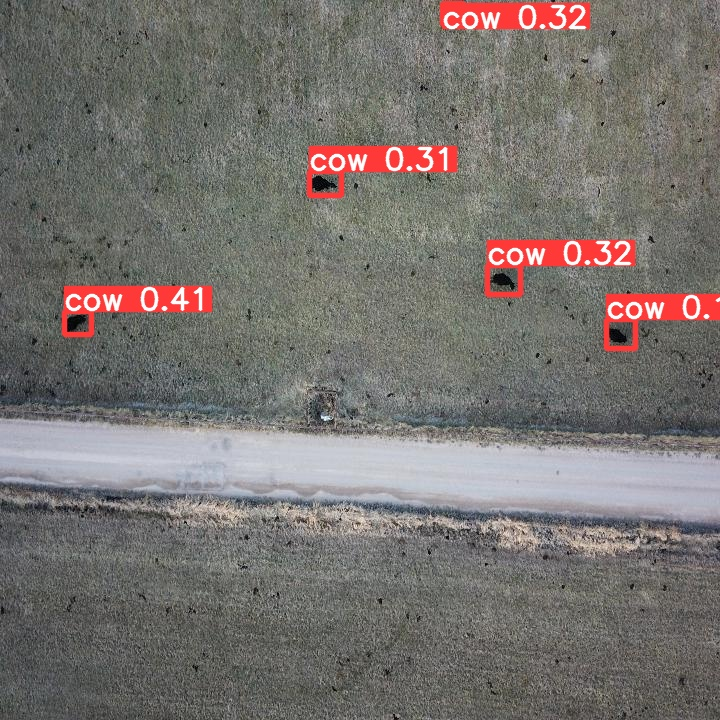



./runs/detect/exp20/AUG_8D4E116E4AA61FA8356226D6E4DA63AB_jpg.rf.0b1619ab5c0f9326034aa8f472912822.jpg


In [5]:
#display inference on ALL test images

import glob
from IPython.display import Image, display

count = 0
max_count = 3 # set this to limit the number of images to be printed

for imageName in glob.glob('./runs/detect/exp20/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")
    print(imageName)
    count += 1
    if count > max_count:
        break

# Validate

In [6]:
!python val.py --weights runs/train/$name/weights/best.pt --img 720 --conf 0.1 --data ../livestalk-carbondale/data.yaml --save-json --save-txt

val: data=../livestalk-carbondale/data.yaml, weights=['runs/train/yolov5s_carbondale_v1/weights/best.pt'], batch_size=32, imgsz=720, conf_thres=0.1, iou_thres=0.6, task=val, device=, single_cls=False, augment=False, verbose=False, save_txt=True, save_hybrid=False, save_conf=False, save_json=True, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v6.0-104-g4ca4aec torch 1.9.0 CUDA:0 (GeForce RTX 3090, 24265MiB)

Fusing layers... 
Model Summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning '/home/omar/datasci/w251-DL/livestalk/livestalk-carbondale/valid/l
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         16         58      0.936      0.776      0.904      0.505
Speed: 0.7ms pre-process, 3.4ms inference, 1.7ms NMS per image at shape (32, 3, 736, 736)

Evaluating pycocotools mAP... saving runs/val/exp7/best_predictions.json...
loading annotations into memory...
pycocotools unable 

# Error Analysis

In [7]:
import torch
from torch.utils.data import DataLoader, Dataset
import numpy as np
import pandas as pd
from PIL import Image
from matplotlib import pyplot as plt
import cv2

class CowDatasetComparison(torch.utils.data.Dataset):
    def __init__(self, root, pred_folder, mode='train'):
        self.root = root
        self.pred_folder = pred_folder

        assert mode in ['train','valid','test'], 'invalid mode argument provided'
        self.mode = mode
        self.data_dir = root + '/' + mode 
        # load all image files, sorting them to
        # ensure that they are aligned
        self.image_files = sorted([name for name in os.listdir(self.data_dir+'/images')])
        self.label_files = sorted([name for name in os.listdir(self.data_dir+'/labels')])
        self.pred_files = sorted([name for name in os.listdir(self.pred_folder+'/labels')])
        assert len(self.image_files) == len(self.label_files)
#         assert len(self.pred_files) == len(self.label_files)
        
        self.files = [x.rsplit('.',1)[0] for x in self.image_files]


    def __getitem__(self, idx):
        
        fname = self.files[idx]
        img_path = f'{self.data_dir}/images/{fname}.jpg'
        label_path = f'{self.data_dir}/labels/{fname}.txt'   
        pred_path = f'{self.pred_folder}/labels/{fname}.txt'   

        image = np.array(Image.open(img_path))
        
        assert image is not None, 'Image not found ' + img_path
        
        gt_annotation_data = pd.read_csv(label_path,sep=' ',header=None,names=['class','x','y','width','height'])
        gt_bboxes = gt_annotation_data[['x','y','width','height']].astype(float).values
        gt_labels = gt_annotation_data['class'].astype(int).values        
                
   
        pred_annotation_data = pd.read_csv(pred_path,sep=' ',header=None,names=['class','x','y','width','height'])
        pred_bboxes = pred_annotation_data[['x','y','width','height']].astype(float).values
        pred_labels = pred_annotation_data['class'].astype(int).values        
        
        return image, gt_bboxes, gt_labels, pred_bboxes, pred_labels, (img_path,label_path)
 

    def __len__(self):
        return len(self.files)
    
        
    
def plot_image(image,gt_boxes, pred_boxes,title=None,show=True,save=False,save_path=None):

    fig,ax=plt.subplots(figsize=(12,12))
    dh,dw,_ = image.shape
    gt_boxes = pd.DataFrame(gt_boxes,columns=['x','y','width','height'])
    for i,row in gt_boxes.iterrows():
        # Taken from https://stackoverflow.com/questions/64096953/how-to-convert-yolo-format-bounding-box-coordinates-into-opencv-format
        l = int((row['x'] - row['width'] / 2) * dw)
        r = int((row['x'] + row['width'] / 2) * dw)
        t = int((row['y'] - row['height'] / 2) * dh)
        b = int((row['y'] + row['height'] / 2) * dh)

        if l < 0:
            l = 0
        if r > dw - 1:
            r = dw - 1
        if t < 0:
            t = 0
        if b > dh - 1:
            b = dh - 1
        gt_color = (0, 0, 255)
        cv2.rectangle(image, (l, t), (r, b), gt_color, 1)
#         cv2.putText(image,'True',(l,t-1), cv2.FONT_HERSHEY_SIMPLEX, 0.5, gt_color)

    pred_boxes = pd.DataFrame(pred_boxes,columns=['x','y','width','height'])
    for i,row in pred_boxes.iterrows():
        # Taken from https://stackoverflow.com/questions/64096953/how-to-convert-yolo-format-bounding-box-coordinates-into-opencv-format
        l = int((row['x'] - row['width'] / 2) * dw)
        r = int((row['x'] + row['width'] / 2) * dw)
        t = int((row['y'] - row['height'] / 2) * dh)
        b = int((row['y'] + row['height'] / 2) * dh)

        if l < 0:
            l = 0
        if r > dw - 1:
            r = dw - 1
        if t < 0:
            t = 0
        if b > dh - 1:
            b = dh - 1

        pred_color = (255,0,0)
        cv2.rectangle(image, (l, t), (r, b), pred_color, 1)    
#         cv2.putText(image,'Pred',(l,t-1), cv2.FONT_HERSHEY_SIMPLEX, 0.5, pred_color)
        
    plt.imshow(image)
    if title is not None:
        plt.title(f'Image {title}')
    plt.axis('off')
    
    # Turn interactive plotting off
    plt.ioff()    
    
    if show:
        plt.show()    
    if save:
        plt.savefig(save_path)
    
    plt.close(fig)
    
    
def save_all_images(dataset):
    new_folder = os.path.join(dataset.pred_folder,'results')
    
    try :
        os.mkdir(new_folder)
    except:
        print('Folder already exists! delete before proceeding')
        return
    
    
    for i in range(len(dataset)):
        
        try: 
            img,gt_boxes,gt_labels,pred_boxes,pred_labels,_ = val_results[i] #enter index here to see different outputs
            
        except:
            print(f'Error with image {i}')
            pass
        plot_image(img,gt_boxes,pred_boxes,save=True,show=False,title=str(i),save_path=new_folder+f'/val-image-{i}.png')
        
        
        

        
        
        
        
    
#change the pred_folder value to point to different results
val_results = CowDatasetComparison(datapath,pred_folder='./runs/val/exp5',mode='test')

In [8]:
save_all_images(val_results)

Folder already exists! delete before proceeding


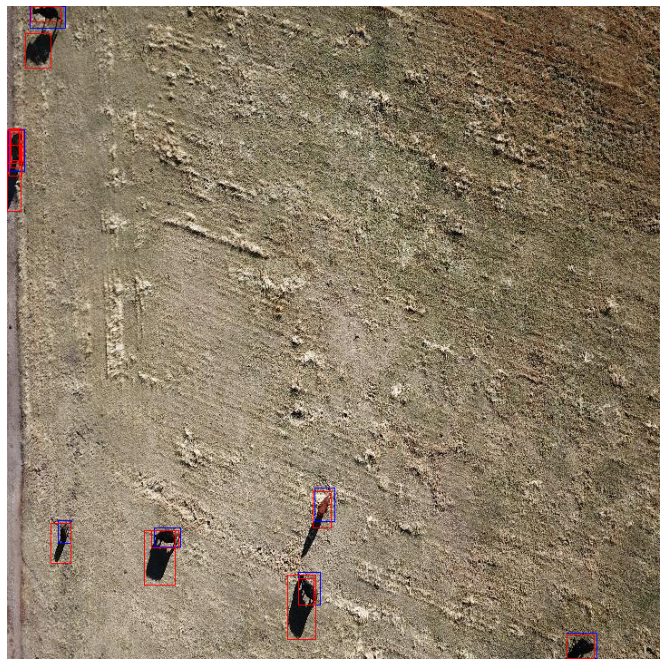

In [9]:
#look at an individual image results
img,gt_boxes,gt_labels,pred_boxes,pred_labels,_ = val_results[10] #enter index here to see different outputs
plot_image(img,gt_boxes,pred_boxes)